In [1]:
# =============================
# CUSTOMER SEGMENTATION PROJECT
# =============================

# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 📂 Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()

Saving ifood_df.csv to ifood_df (1).csv


In [3]:
df = pd.read_csv('ifood_df.csv')
print("✅ Dataset Loaded Successfully!")
print("Shape of Data:", df.shape)
df.head()

✅ Dataset Loaded Successfully!
Shape of Data: (2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
# 📊 Step 3: Basic Information
print("\n--- Data Info ---")
df.info()
print("\n--- Null Values ---")
print(df.isnull().sum())
print("\n--- Summary Statistics ---")
print(df.describe())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  Ac

In [5]:
# 🧹 Step 4: Data Cleaning
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [6]:
# Replace nulls with 0 or median if necessary
df.fillna(0, inplace=True)

In [7]:
print("\n✅ Data Cleaned! Shape after cleaning:", df.shape)


✅ Data Cleaned! Shape after cleaning: (2021, 39)


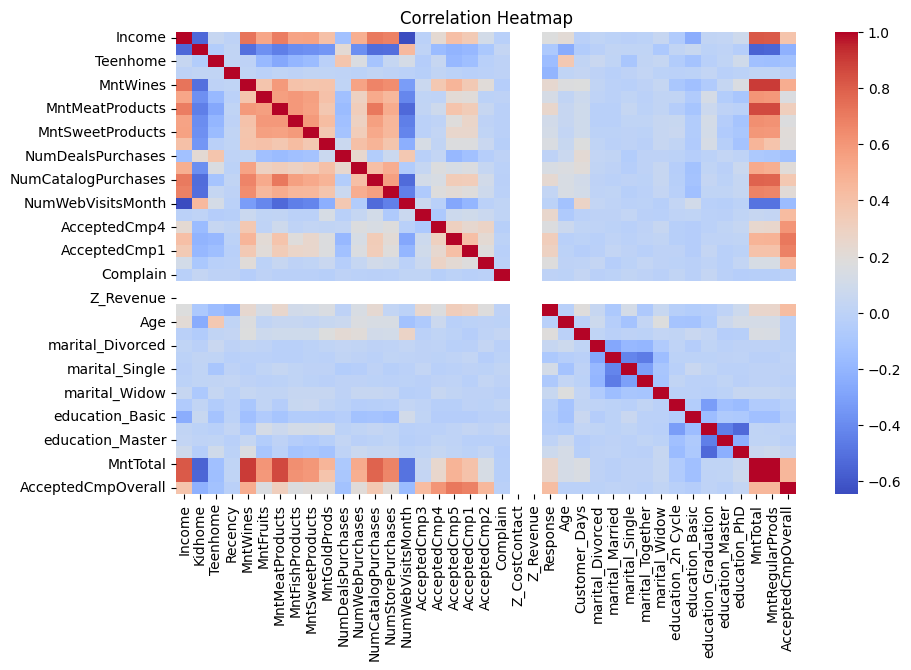

In [8]:
# 🔍 Step 5: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

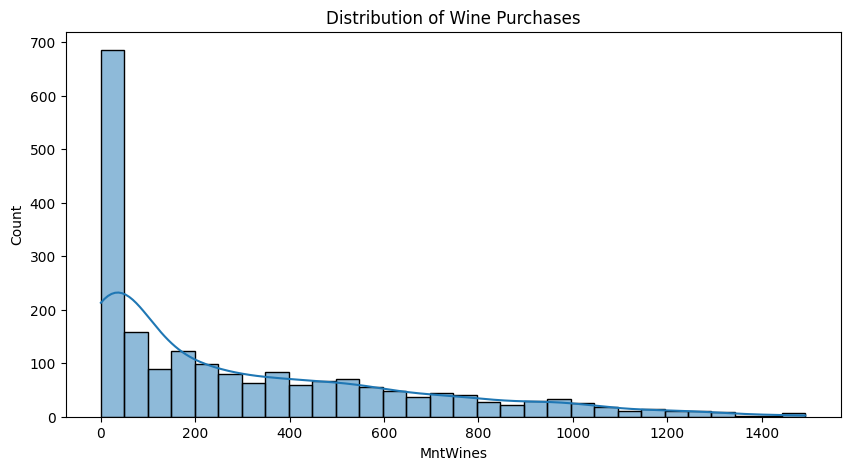

In [9]:
# Example distribution visualization
plt.figure(figsize=(10,5))
sns.histplot(df['MntWines'], bins=30, kde=True)
plt.title("Distribution of Wine Purchases")
plt.show()


In [10]:
# 🧮 Step 6: Feature Selection
# Select only numerical columns for clustering
num_df = df.select_dtypes(include=[np.number])

# Standardize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)


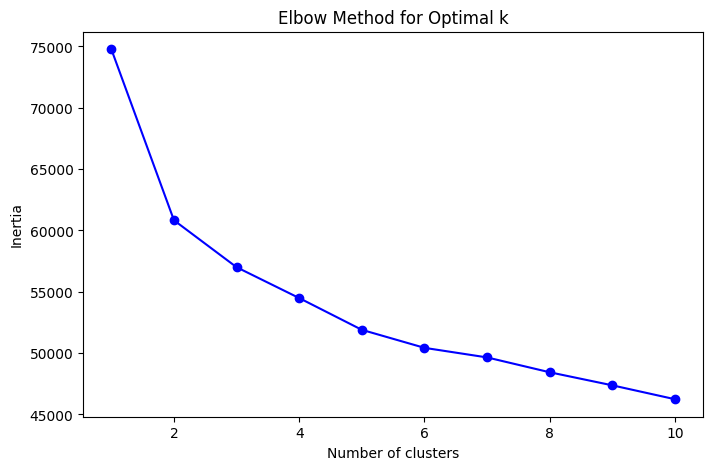

In [11]:
# 🔢 Step 7: Finding Optimal Clusters using Elbow Method
inertia = []
K = range(1,11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [12]:
# 🧠 Step 8: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters
print("\n✅ K-Means Applied! Cluster counts:")
print(df['Cluster'].value_counts())



✅ K-Means Applied! Cluster counts:
Cluster
0    954
2    592
1    449
3     26
Name: count, dtype: int64


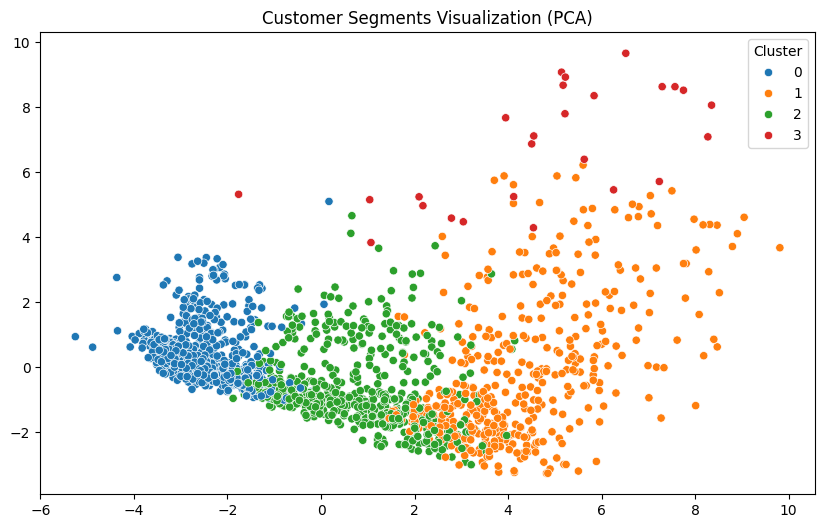

In [13]:
# 🎨 Step 9: Visualizing Clusters using PCA
pca = PCA(2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['Cluster'], palette='tab10')
plt.title("Customer Segments Visualization (PCA)")
plt.show()


In [14]:
# 📈 Step 10: Cluster Insights
cluster_summary = df.groupby('Cluster').mean()
print("\n--- Cluster Summary ---")
display(cluster_summary)

# 💡 Step 11: Insights
for i in range(cluster_summary.shape[0]):
    print(f"\n🧩 Cluster {i} Insights:")
    print(cluster_summary.iloc[i].sort_values(ascending=False).head(5))

print("\n🎯 Project Completed Successfully!")


--- Cluster Summary ---


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Cluster,,,,,,,,,,,,,,,,,,,,,
0,34732.001048,0.803983,0.458071,49.343816,45.013627,5.014675,24.639413,7.254717,5.169811,16.368973,...,0.251572,0.022013,0.103774,0.050314,0.489518,0.167715,0.188679,87.092243,70.723270,0.085954
1,77090.380846,0.035635,0.140312,49.563474,646.924276,68.619154,487.285078,102.968820,72.169265,77.151448,...,0.240535,0.044543,0.086860,0.000000,0.550111,0.155902,0.207127,1377.966592,1300.815145,0.728285
2,58875.505068,0.189189,0.878378,47.717905,443.714527,28.805743,146.197635,36.875000,28.619932,61.935811,...,0.256757,0.047297,0.072635,0.001689,0.484797,0.173986,0.266892,684.212838,622.277027,0.209459
3,71451.576923,0.038462,0.384615,46.576923,897.307692,24.461538,260.038462,38.961538,31.961538,70.884615,...,0.346154,0.038462,0.076923,0.000000,0.538462,0.076923,0.307692,1252.730769,1181.846154,3.000000



🧩 Cluster 0 Insights:
Income             34732.001048
Customer_Days       2482.024109
MntTotal              87.092243
MntRegularProds       70.723270
Recency               49.343816
Name: 0, dtype: float64

🧩 Cluster 1 Insights:
Income             77090.380846
Customer_Days       2520.385301
MntTotal            1377.966592
MntRegularProds     1300.815145
MntWines             646.924276
Name: 1, dtype: float64

🧩 Cluster 2 Insights:
Income             58875.505068
Customer_Days       2551.925676
MntTotal             684.212838
MntRegularProds      622.277027
MntWines             443.714527
Name: 2, dtype: float64

🧩 Cluster 3 Insights:
Income             71451.576923
Customer_Days       2527.923077
MntTotal            1252.730769
MntRegularProds     1181.846154
MntWines             897.307692
Name: 3, dtype: float64

🎯 Project Completed Successfully!
